Computational Graph
====================

In [7]:
import torch
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [11]:
true_b = 1
true_w = 2
N = 100
# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)
# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]
# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

# Our data was in Numpy arrays, but we need to transform them
# into PyTorch's Tensors and then we send them to the
# chosen device
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

In [14]:
from torch import nn
from torchviz import make_dot, make_dot_from_trace

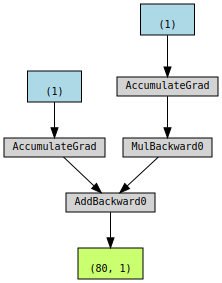

In [15]:
# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
    dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
    dtype=torch.float, device=device)
# Step 1 - Computes our model's predicted output 
#        - forward pass
yhat = b + w * x_train_tensor
# Step 2 - Computes the loss
error = (yhat - y_train_tensor)
loss = (error ** 2).mean()
# We can try plotting the graph for any python variable:
# yhat, error, loss...
make_dot(yhat)